[View in Colaboratory](https://colab.research.google.com/github/droidkid/data-science-from-scratch-notebooks/blob/master/Hypothesis.ipynb)

## Hypothesis Testing

Let's go straight into an example (I'm not entirely clear on this yet)


Let's say we have a coin (yes, again - be prepared for a lot of coins) and you need to convince your friend that it's a fair coin (p=0.50 for heads). 

Hypothesis H0: p = 0.50. 

Let X be a random variable - number of heads out of 1000 coin flips. According to CLT, X follows a normal distribution.

If H0 was true, what's range of values I should expect if I set out to measure X? 
(We're using range here, because remember X has a continuous distribution)


Let's have a look at the distribution and some ranges - 

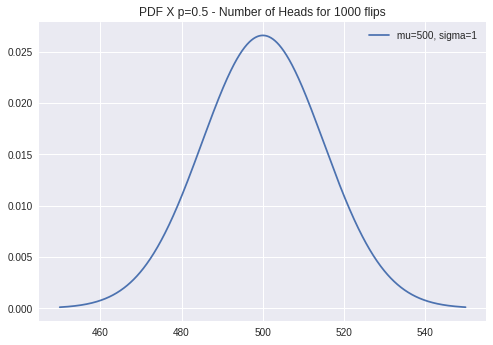

lo to hi: 	 p 	 1-p
490 to 510: 0.495015 0.504985
480 to 520: 0.817578 0.182422
470 to 530: 0.954500 0.045500
460 to 540: 0.992339 0.007661
450 to 550: 0.999142 0.000858
440 to 560: 0.999937 0.000063
430 to 570: 0.999997 0.000003
420 to 580: 1.000000 0.000000
410 to 590: 1.000000 0.000000


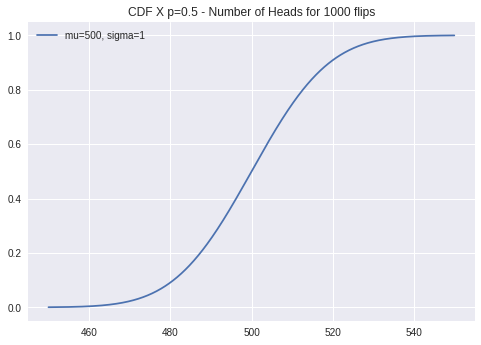

0 to 400: 0.000000
0 to 420: 0.000000
0 to 440: 0.000032
0 to 460: 0.003830
0 to 480: 0.091211
0 to 500: 0.500000
0 to 520: 0.908789
0 to 540: 0.996170
0 to 560: 0.999968
0 to 580: 1.000000


In [44]:
from matplotlib import pyplot as plt
import random
import math

xs = [x/10 for x in range(4500, 5500)]

def normal_pdf(x, mu, sigma):
    sq = math.sqrt(2 * math.pi)
    exp_pow = - ((x-mu) ** 2) / (2 * sigma ** 2) 
    return math.exp(exp_pow) / (sq * sigma)
  
def normal_cdf(x, mu, sigma):
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def probability_of_range(lo, hi, mu, sigma):
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

plt.plot(xs, [normal_pdf(x,500,15) for x in xs], '-', label = 'mu=500, sigma=1')
plt.title("PDF X p=0.5 - Number of Heads for 1000 flips")
plt.legend()
plt.show()
# Print some probability ranges around 500
print( "lo to hi: \t p \t 1-p")
for i in range(10, 100, 10):
  p = probability_of_range(500-i, 500+i, 500, 15)
  print( "%d to %d: %.6f %.6f" % (500-i, 500+i, p, 1-p))


plt.plot(xs, [normal_cdf(x,500,15) for x in xs], '-', label = 'mu=500, sigma=1')
plt.title("CDF X p=0.5 - Number of Heads for 1000 flips")
plt.legend()
plt.show()
# Print some cumulative probability ranges from 400 to 600
for i in range(400, 600, 20):
  print( "%d to %d: %.6f" % (0, i,probability_of_range(0,i, 500, 15)))


The above graphs and ranges should give you a idea of what we're trying to do with hypothesis testing.

Lets take the range 470-530. The probability of X being in this range is ~95%, meaning there's a 5% chance it will not be in this range. 

So if I flip a coin 1000 times and I get 400 heads - that means I'm either really really lucky or more probably the hypothesis of p being 0.5 is false. 

If H0 is correct, 95 times out 100 X should be between 470-530 and 99 times out of 100 it should be between 460 and 540. 

1. Set a Hypothesis
2. Calculate a range of values you're willing to accept (generally 95-99% of all possible values)
3. Test out the hypothesis by checking if the result of experiment does fall in your chosen range.




